 Code written by Shashank Jerri(AI21MTECH11003) and Aman Ladkat(AI21MTECH14011)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
#from tensorflow.keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
Ravdess = "/content/drive/MyDrive/DL Project/Audio_Song_Actors_01-24/"
Savee = "/content/drive/MyDrive/DL Project/ALL/"
Tess = "/content/drive/MyDrive/DL Project/TESS Toronto emotional speech set data/"

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
df_emotion = pd.DataFrame(file_emotion, columns=['Emotions'])

df_path = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([df_emotion, df_path], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,/content/drive/MyDrive/DL Project/Audio_Song_A...
1,neutral,/content/drive/MyDrive/DL Project/Audio_Song_A...
2,neutral,/content/drive/MyDrive/DL Project/Audio_Song_A...
3,neutral,/content/drive/MyDrive/DL Project/Audio_Song_A...
4,calm,/content/drive/MyDrive/DL Project/Audio_Song_A...


In [ ]:
tess_dir_ls = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_dir_ls:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
df_emotion = pd.DataFrame(file_emotion, columns=['Emotions'])

df_path = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([df_emotion, df_path], axis=1)
Tess_df.head()

,Emotions,Path
0,sad,/content/drive/MyDrive/DL Project/TESS Toronto...
1,sad,/content/drive/MyDrive/DL Project/TESS Toronto...
2,sad,/content/drive/MyDrive/DL Project/TESS Toronto...
3,sad,/content/drive/MyDrive/DL Project/TESS Toronto...
4,sad,/content/drive/MyDrive/DL Project/TESS Toronto...


In [ ]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
df_emotion = pd.DataFrame(file_emotion, columns=['Emotions'])

df_path = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([df_emotion, df_path], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,/content/drive/MyDrive/DL Project/ALL/DC_a01.wav
1,angry,/content/drive/MyDrive/DL Project/ALL/DC_a05.wav
2,angry,/content/drive/MyDrive/DL Project/ALL/DC_a03.wav
3,angry,/content/drive/MyDrive/DL Project/ALL/DC_a07.wav
4,angry,/content/drive/MyDrive/DL Project/ALL/DC_a08.wav


In [ ]:
data_path = pd.concat([Ravdess_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,/content/drive/MyDrive/DL Project/Audio_Song_A...
1,neutral,/content/drive/MyDrive/DL Project/Audio_Song_A...
2,neutral,/content/drive/MyDrive/DL Project/Audio_Song_A...
3,neutral,/content/drive/MyDrive/DL Project/Audio_Song_A...
4,calm,/content/drive/MyDrive/DL Project/Audio_Song_A...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


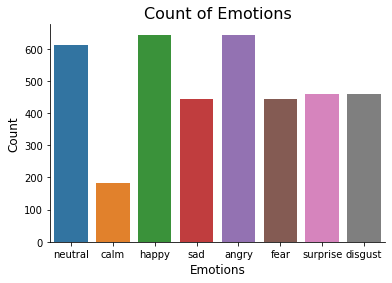

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
def plotWaveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def plotSpectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

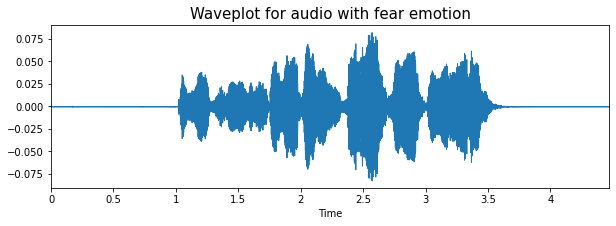

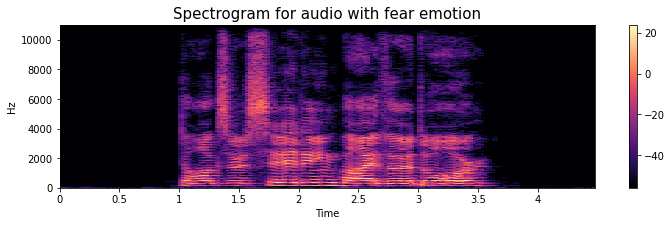

In [ ]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
plotWaveplot(data, sampling_rate, emotion)
plotSpectrogram(data, sampling_rate, emotion)

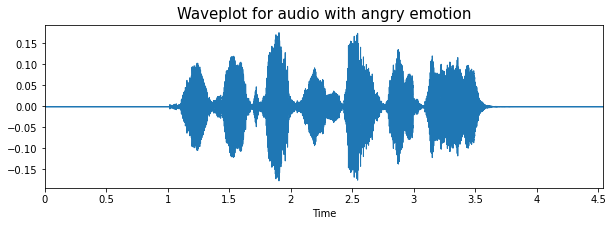

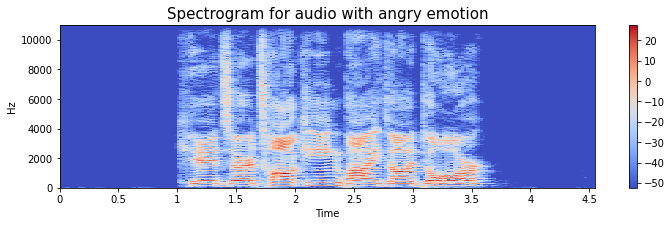

In [ ]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
plotWaveplot(data, sampling_rate, emotion)
plotSpectrogram(data, sampling_rate, emotion)

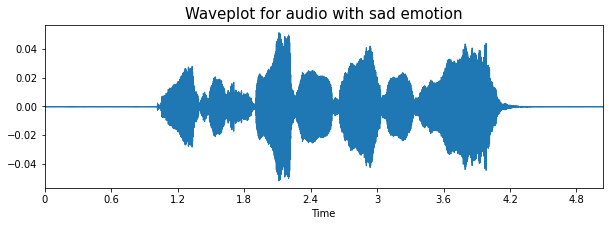

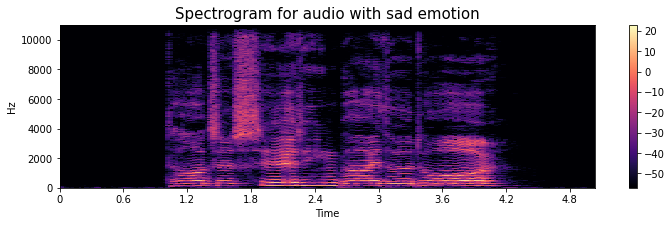

In [ ]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
plotWaveplot(data, sampling_rate, emotion)
plotSpectrogram(data, sampling_rate, emotion)

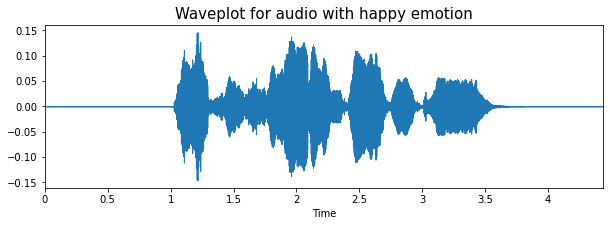

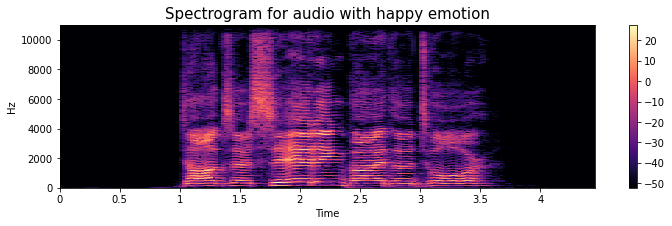

In [ ]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
plotWaveplot(data, sampling_rate, emotion)
plotSpectrogram(data, sampling_rate, emotion)

In [ ]:
def addNoise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def addStretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def addPitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

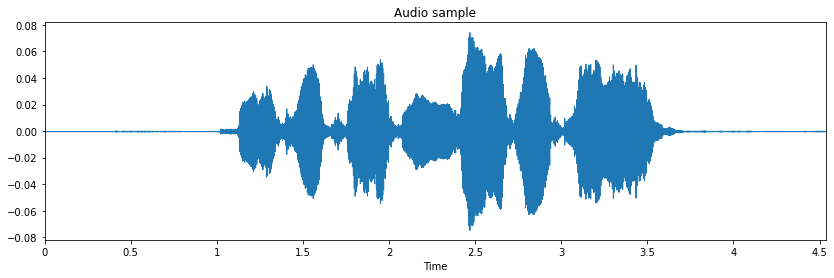

In [ ]:
plt.figure(figsize=(14,4))
plt.title("Audio sample")
librosa.display.waveplot(y=data, sr=sample_rate)

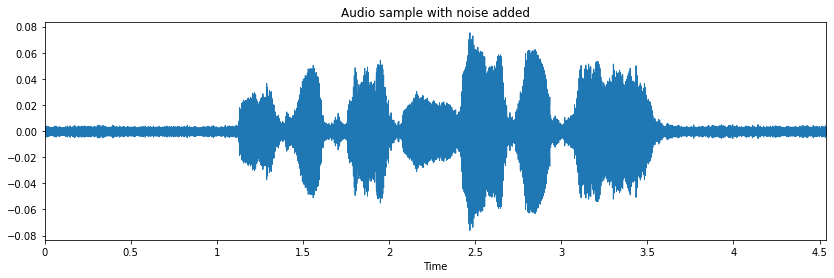

In [ ]:
x = addNoise(data)
plt.figure(figsize=(14,4))
plt.title("Audio sample with noise added")
librosa.display.waveplot(y=x, sr=sample_rate)

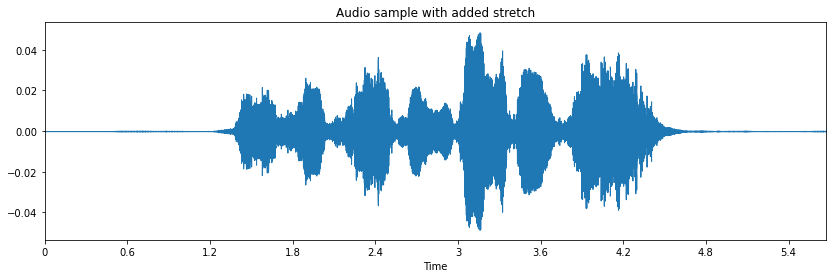

In [ ]:
x = addStretch(data)
plt.figure(figsize=(14,4))
plt.title("Audio sample with added stretch")
librosa.display.waveplot(y=x, sr=sample_rate)

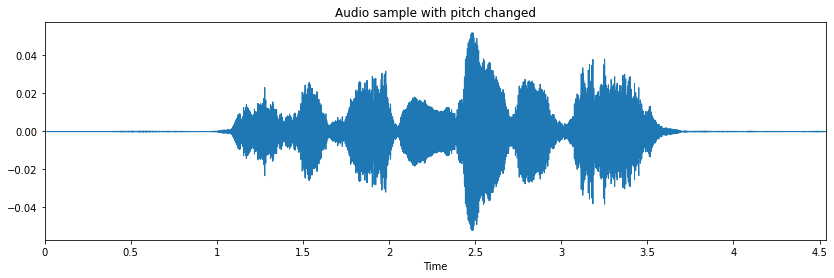

In [ ]:
x = addPitch(data, sample_rate)
plt.figure(figsize=(14,4))
plt.title("Audio sample with pitch changed")
librosa.display.waveplot(y=x, sr=sample_rate)

In [ ]:
def featureExtraction(data):
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) 

    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) 

    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) 

    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))

    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) 
    
    return result

def fetchFeatures(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    res1 = featureExtraction(data)
    result = np.array(res1)
    
    noise_data = addNoise(data)
    res2 = featureExtraction(noise_data)
    result = np.vstack((result, res2)) 
    
    new_data = addStretch(data)
    data_stretch_pitch = addPitch(new_data, sample_rate)
    res3 = featureExtraction(data_stretch_pitch)
    result = np.vstack((result, res3))
    
    return result

In [ ]:
X, Y = [], []
for path, emotion, index in zip(data_path.Path, data_path.Emotions,range(data_path.Path.shape[0])):
    feature = fetchFeatures(path)
    if index % 100 == 0:
        print(index, " samples have been processed...") 
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

0  samples have been processed...
100  samples have been processed...
200  samples have been processed...
300  samples have been processed...
400  samples have been processed...
500  samples have been processed...
600  samples have been processed...
700  samples have been processed...
800  samples have been processed...
900  samples have been processed...
1000  samples have been processed...
1100  samples have been processed...
1200  samples have been processed...
1300  samples have been processed...
1400  samples have been processed...
1500  samples have been processed...
1600  samples have been processed...
1700  samples have been processed...
1800  samples have been processed...
1900  samples have been processed...
2000  samples have been processed...
2100  samples have been processed...
2200  samples have been processed...
2300  samples have been processed...
2400  samples have been processed...
2500  samples have been processed...
2600  samples have been processed...
2700  samples

In [ ]:
len(X), len(Y), data_path.Path.shape

(11676, 11676, (3892,))

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.099971,0.539632,0.446196,0.515718,0.577349,0.628414,0.716325,0.598331,0.559482,0.510549,...,0.000005,7.255510e-06,0.000008,0.000009,0.000012,0.000020,0.000014,0.000005,4.432324e-07,neutral
1,0.189910,0.593846,0.496426,0.559989,0.614137,0.690950,0.739132,0.609267,0.600260,0.544937,...,0.000074,8.004637e-05,0.000079,0.000077,0.000086,0.000090,0.000090,0.000079,7.829863e-05,neutral
2,0.101302,0.502762,0.518589,0.420743,0.514526,0.570258,0.607393,0.699794,0.556541,0.570774,...,0.000002,9.734505e-07,0.000001,0.000002,0.000002,0.000002,0.000002,0.000001,1.808015e-07,neutral
3,0.126004,0.536471,0.451673,0.509978,0.570012,0.622235,0.669922,0.587245,0.593905,0.558836,...,0.000013,1.756928e-05,0.000030,0.000030,0.000044,0.000036,0.000025,0.000008,5.881226e-07,neutral
4,0.150992,0.583708,0.492944,0.530979,0.601031,0.658451,0.712660,0.625677,0.615159,0.568971,...,0.000014,1.846036e-05,0.000032,0.000031,0.000045,0.000037,0.000026,0.000009,1.450949e-06,neutral


In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8757, 162), (8757, 8), (2919, 162), (2919, 8))

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8757, 162), (8757, 8), (2919, 162), (2919, 8))

In [ ]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8757, 162, 1), (8757, 8), (2919, 162, 1), (2919, 8))

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 21, 128)          0

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
137/137 [==============================] - 64s 446ms/step - loss: 1.7723 - accuracy: 0.3116 - val_loss: 1.5988 - val_accuracy: 0.4584 - lr: 0.0010
Epoch 2/50
137/137 [==============================] - 61s 446ms/step - loss: 1.4878 - accuracy: 0.4242 - val_loss: 1.3534 - val_accuracy: 0.4923 - lr: 0.0010
Epoch 3/50
137/137 [==============================] - 60s 439ms/step - loss: 1.2367 - accuracy: 0.5281 - val_loss: 0.9369 - val_accuracy: 0.6632 - lr: 0.0010
Epoch 4/50
137/137 [==============================] - 60s 438ms/step - loss: 1.0291 - accuracy: 0.6114 - val_loss: 0.7848 - val_accuracy: 0.7229 - lr: 0.0010
Epoch 5/50
137/137 [==============================] - 83s 610ms/step - loss: 0.8909 - accuracy: 0.6621 - val_loss: 0.6736 - val_accuracy: 0.7530 - lr: 0.0010
Epoch 6/50
137/137 [==============================] - 68s 493ms/step - loss: 0.7802 - accuracy: 0.7120 - val_loss: 0.5630 - val_accuracy: 0.7849 - lr: 0.0010
Epoch 7/50
137/137 [==============================] 

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

92/92 [==============================] - 8s 84ms/step - loss: 0.2775 - accuracy: 0.9270
Accuracy of our model on test data :  92.70297884941101 %


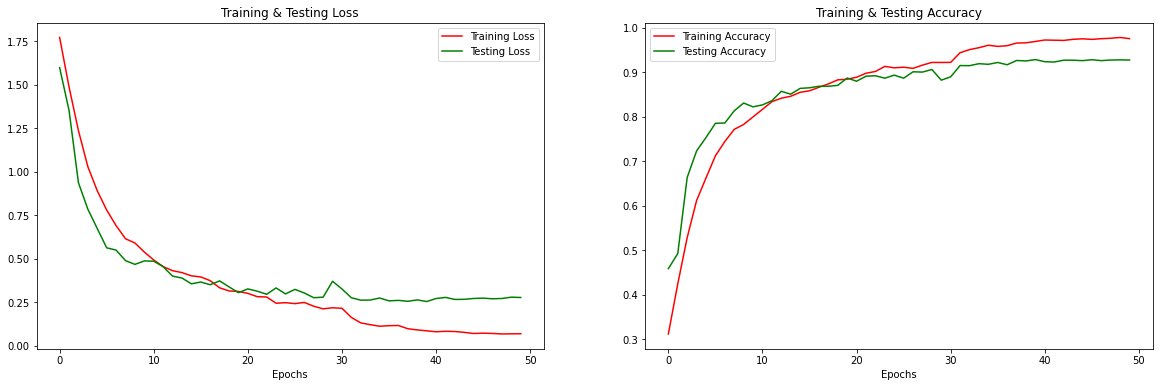

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss', color="red")
ax[0].plot(epochs , test_loss , label = 'Testing Loss', color="green")
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy', color="red")
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy', color="green")
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,fear,fear
1,neutral,neutral
2,angry,angry
3,disgust,disgust
4,angry,angry
5,sad,sad
6,disgust,disgust
7,angry,angry
8,happy,happy
9,happy,happy


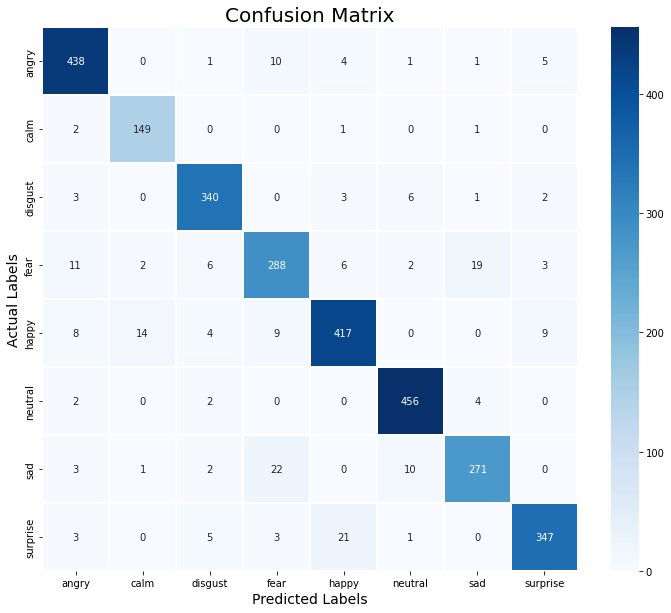

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
conf_mat  = pd.DataFrame(conf_mat  , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(conf_mat , linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.93      0.95      0.94       460
        calm       0.90      0.97      0.93       153
     disgust       0.94      0.96      0.95       355
        fear       0.87      0.85      0.86       337
       happy       0.92      0.90      0.91       461
     neutral       0.96      0.98      0.97       464
         sad       0.91      0.88      0.89       309
    surprise       0.95      0.91      0.93       380

    accuracy                           0.93      2919
   macro avg       0.92      0.93      0.92      2919
weighted avg       0.93      0.93      0.93      2919

